# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

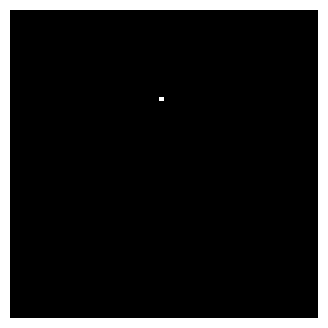

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()

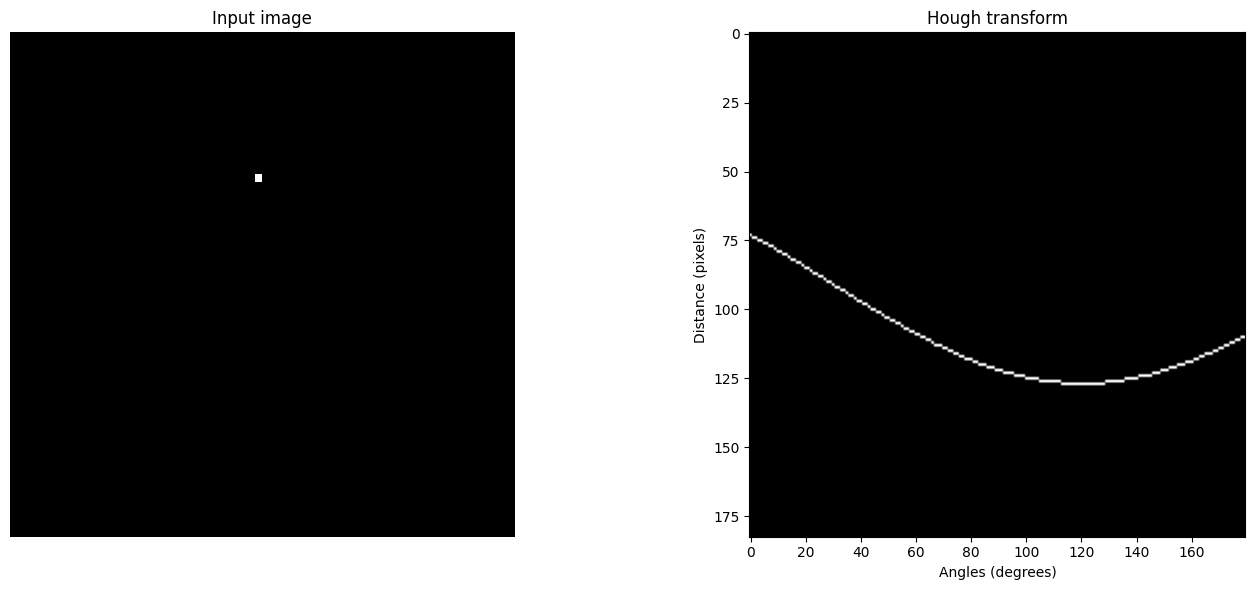

In [3]:
H, _, _ = hough_line(image=im)
show_hough(H, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

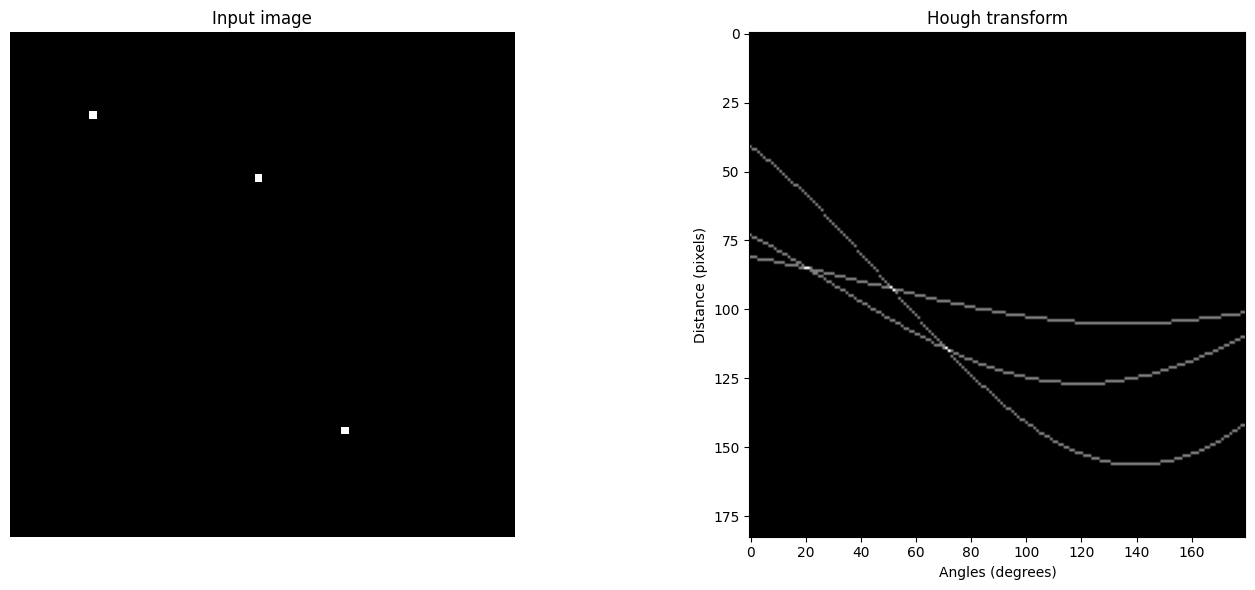

In [4]:
im[10, 10] = 1
im[50, 42] = 1
H, _, _ = hough_line(image=im)
show_hough(H, im)

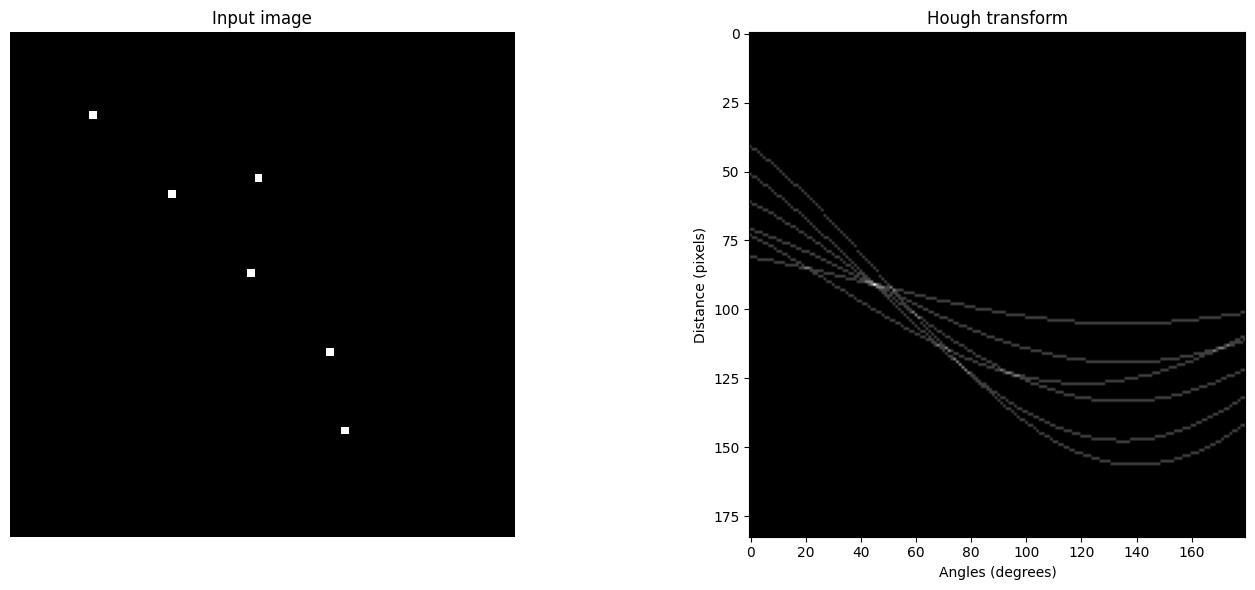

In [5]:
im[10, 10] = 1
im[20, 20] = 1
im[30, 30] = 1
im[40, 40] = 1
H, _, _ = hough_line(image=im)
show_hough(H, im)

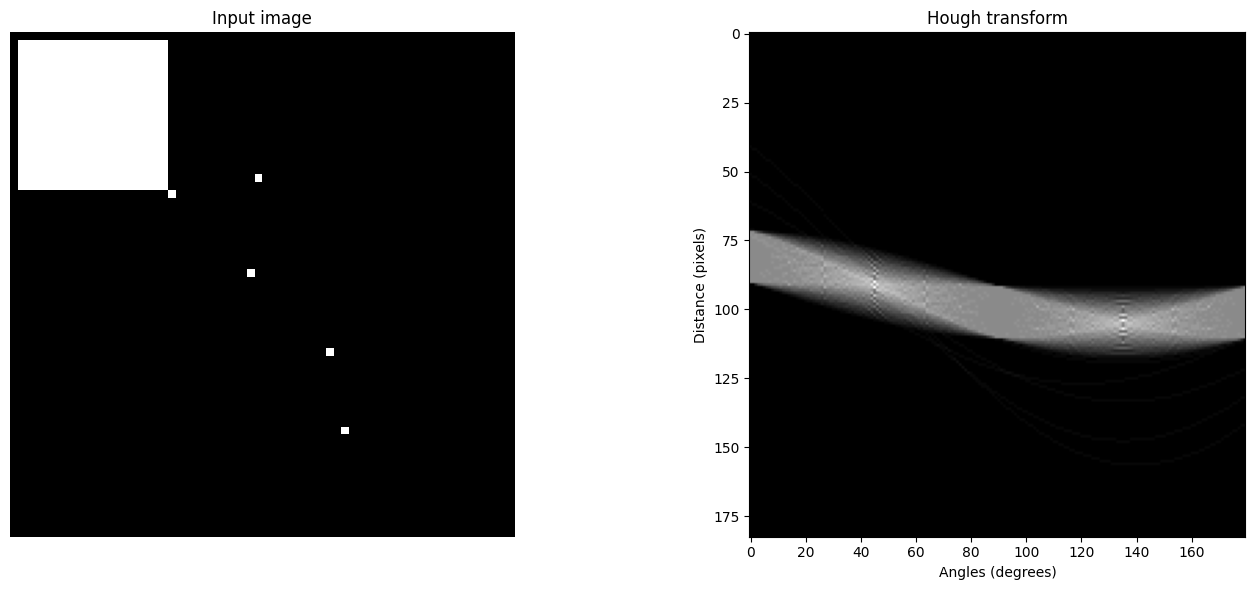

In [6]:
from itertools import product

for a, b in product(range(1, 20), range(1, 20)):
    im[a, b] = 1
H, _, _ = hough_line(image=im)
show_hough(H, im)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

In [193]:
def load_image(image_name, grayscale=True):
    image = cv2.imread(image_name)
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

def display(*images, size=5):
    plt.gray()
    n = len(images)
    fig, ax = plt.subplots(1, n, squeeze=False)
    fig.set_size_inches(size*n, size)
    for i, image in enumerate(images):
        ax[0][i].imshow(image)
        ax[0][i].axis('off')
    plt.show()


def detect_edges(image):
    gaussian = cv2.GaussianBlur(image, [3, 3], 0)
    canny = cv2.Canny(gaussian, 100, 200, None, 3, 1)
    return canny

<Figure size 640x480 with 0 Axes>

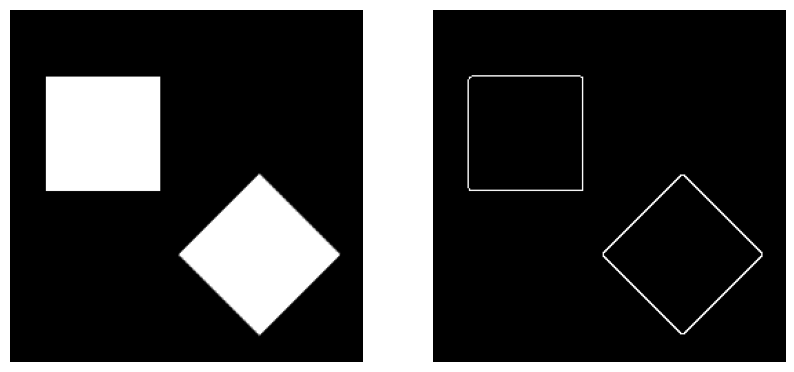

In [194]:
squares_im = load_image("kwadraty.png")
square_edges = detect_edges(squares_im)
display(squares_im, square_edges)

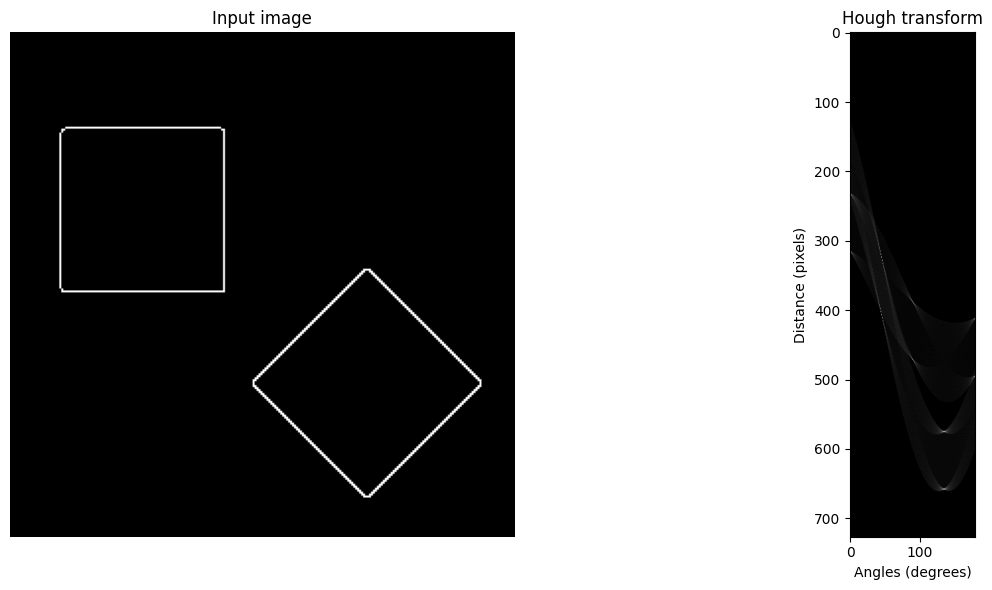

In [195]:
H, theta, rho = hough_line(square_edges)
show_hough(H, square_edges)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

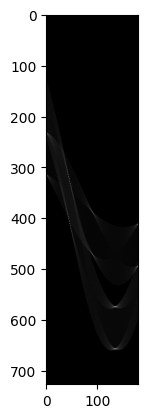

In [196]:
_,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

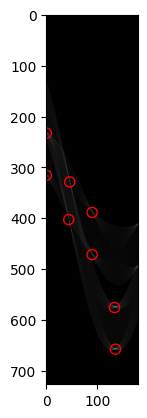

In [197]:
_, ax = plt.subplots(1)
ax.set_aspect('equal')
max_dist_H = H.shape[0] / 2

for accum, angle, dist in zip(*hough_line_peaks(H, theta, rho)):
    angle_degrees = angle * 180 / np.pi
    angle_degrees += 90
    dist += max_dist_H
    circle = plt.Circle((angle_degrees, dist), 10, color='r', fill=False)
    ax.add_patch(circle)

ax.imshow(H, 'gray')

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [235]:
lines = cv2.HoughLines(square_edges, 1, np.pi / 180, 50, None, 0, 0)

In [236]:
lines = np.squeeze(lines)

<Figure size 640x480 with 0 Axes>

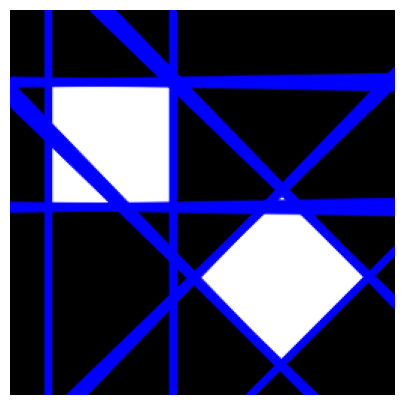

In [237]:
squares_original = load_image("kwadraty.png", grayscale=False)

for i in range(0, len(lines)):
    rho = lines[i][0]
    theta = lines[i][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(squares_original, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

display(squares_original)

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

<Figure size 640x480 with 0 Axes>

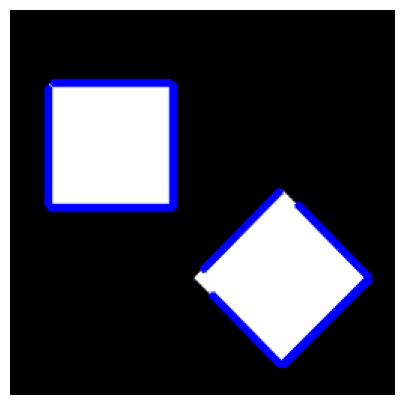

In [243]:
squares_original = load_image("kwadraty.png", grayscale=False)

segments = cv2.HoughLinesP(square_edges, 1, np.pi / 180, 50, None, 0, 0)
for i in range(0, len(segments)):
    l = segments[i][0]
    cv2.line(squares_original, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
display(squares_original)

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

<Figure size 640x480 with 0 Axes>

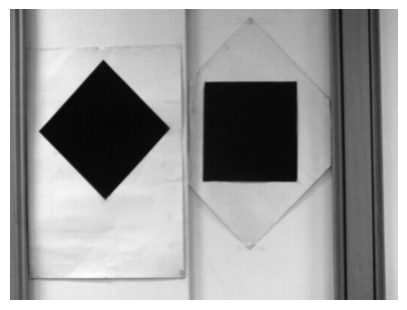

<Figure size 640x480 with 0 Axes>

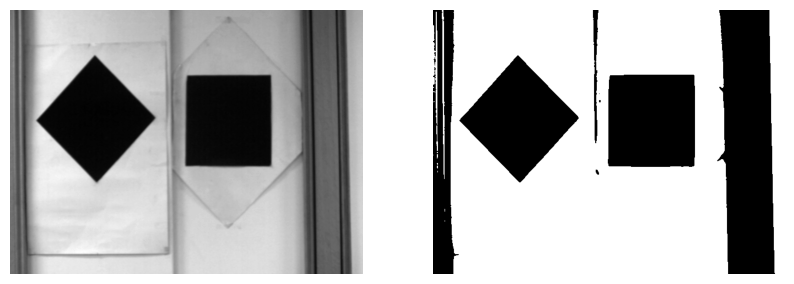

<Figure size 640x480 with 0 Axes>

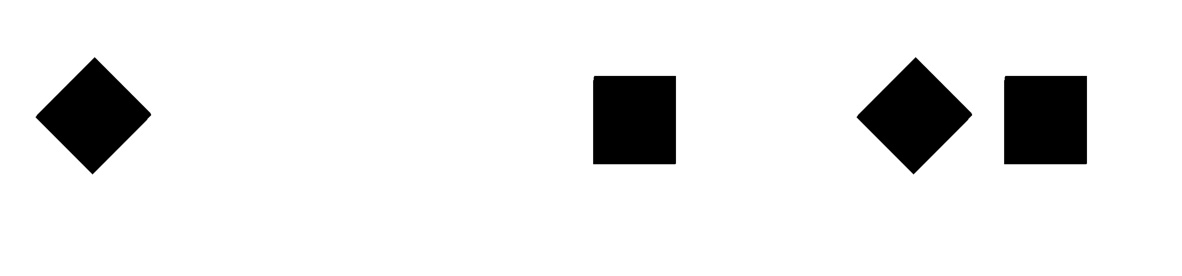

<Figure size 640x480 with 0 Axes>

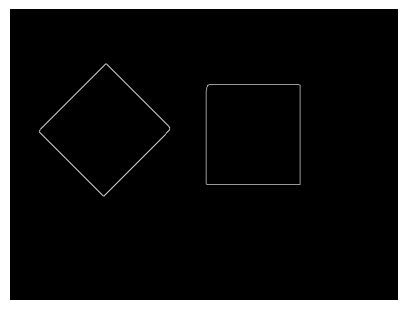

In [497]:
from skimage.morphology import diamond, square

image = load_image("lab112.png")

display(image)
gaussian = cv2.GaussianBlur(image, (3, 3), 0)
binarized = cv2.threshold(gaussian, 0, 255, cv2.THRESH_OTSU)[1]
display(gaussian, binarized)

kernel_diamond = diamond(20)
kernel_square = square(30)
detect_diamond = cv2.morphologyEx(binarized, cv2.MORPH_CLOSE, kernel_diamond, iterations=5)
detect_square = cv2.morphologyEx(binarized, cv2.MORPH_CLOSE, kernel_square, iterations=5)
object_detection = detect_square & detect_diamond

display(detect_diamond, detect_square, object_detection)

canny = detect_edges(object_detection)
display(canny)

<Figure size 640x480 with 0 Axes>

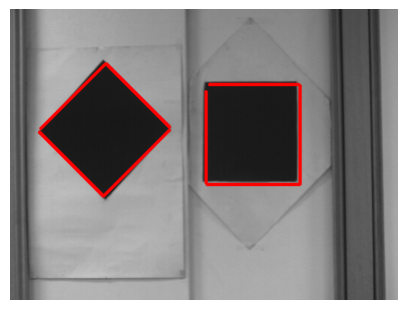

In [498]:
original = load_image("lab112.png", grayscale=False)
segments = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 0, 0)
for i in range(0, len(segments)):
    l = segments[i][0]
    cv2.line(original, (l[0], l[1]), (l[2], l[3]), (255,0, 0), 3, cv2.LINE_AA)

display(original)

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

<Figure size 640x480 with 0 Axes>

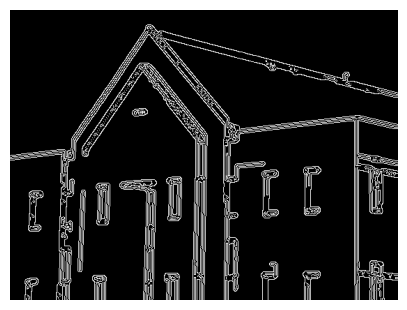

In [502]:
image = load_image("dom.png")
gaussian = cv2.GaussianBlur(image, (3, 3), 0)
canny = detect_edges(canny)
display(canny)

<Figure size 640x480 with 0 Axes>

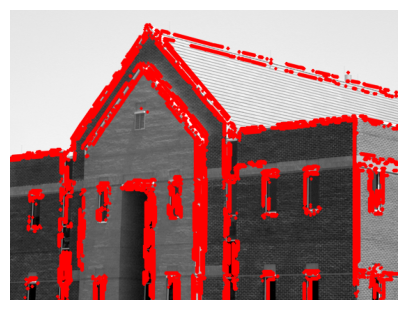

In [503]:
original = load_image("dom.png", grayscale=False)
segments = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 0, 0)
for i in range(0, len(segments)):
    l = segments[i][0]
    cv2.line(original, (l[0], l[1]), (l[2], l[3]), (255,0, 0), 3, cv2.LINE_AA)

display(original)